In [1]:
# linear algebra
import numpy as np 
import sklearn

# data processing
import pandas as pd

#feature
import featuretools as ft

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
!pip install -U seaborn

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.10.1)


In [3]:
from google.colab import files
uploaded = files.upload()
df2 = pd.read_csv('Test.csv')

Saving Test.csv to Test (2).csv


In [4]:
df2.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
0,EID_22713,F,32.0,5,Single,Springfield,R&D,Conceptual,7.0,4,30,1,5,4.0,type2,1.0,3,-0.9612,-0.4537,2.0,1,8,4
1,EID_9658,M,65.0,2,Single,Lebanon,IT,Directive,41.0,2,72,1,1,1.0,type2,1.0,4,-0.9612,0.7075,1.0,2,8,2
2,EID_22203,M,52.0,3,Married,Springfield,Sales,Directive,21.0,3,25,0,1,8.0,type3,1.0,4,-0.1048,0.7075,2.0,1,9,3
3,EID_7652,M,50.0,5,Single,Washington,Marketing,Analytical,11.0,4,28,1,1,2.0,type0,4.0,3,-0.1048,0.7075,2.0,2,8,3
4,EID_6516,F,44.0,3,Married,Franklin,R&D,Conceptual,12.0,4,47,1,3,2.0,type2,4.0,4,1.6081,0.7075,2.0,2,7,4


In [5]:
print(df2.isnull().count()) #Checking Null Values

Employee_ID                  3000
Gender                       3000
Age                          3000
Education_Level              3000
Relationship_Status          3000
Hometown                     3000
Unit                         3000
Decision_skill_possess       3000
Time_of_service              3000
Time_since_promotion         3000
growth_rate                  3000
Travel_Rate                  3000
Post_Level                   3000
Pay_Scale                    3000
Compensation_and_Benefits    3000
Work_Life_balance            3000
VAR1                         3000
VAR2                         3000
VAR3                         3000
VAR4                         3000
VAR5                         3000
VAR6                         3000
VAR7                         3000
dtype: int64


In [6]:
median= df2.median()
print(median) #Calculating Median for replacing null values with

Age                     38.0000
Education_Level          3.0000
Time_of_service         10.0000
Time_since_promotion     2.0000
growth_rate             47.0000
Travel_Rate              1.0000
Post_Level               3.0000
Pay_Scale                6.0000
Work_Life_balance        2.0000
VAR1                     3.0000
VAR2                    -0.1048
VAR3                    -0.4537
VAR4                     2.0000
VAR5                     3.0000
VAR6                     7.0000
VAR7                     3.0000
dtype: float64


In [7]:
null_counts = df2.isnull().sum()
null_counts[null_counts > 0].sort_values(ascending=False) #how many null values

VAR4                 298
VAR2                 217
Age                  161
Time_of_service       52
Work_Life_balance      5
Pay_Scale              3
dtype: int64

In [8]:
#replacing null values

df2['Work_Life_balance'].fillna(df2['Work_Life_balance'].median(), inplace = True)
df2['VAR4'].fillna(df2['VAR4'].median(), inplace = True)
df2['VAR2'].fillna(df2['VAR2'].median(), inplace = True)
df2['Age'].fillna(df2['Age'].median(), inplace = True)
df2['Time_of_service'].fillna(df2['Time_of_service'].median(), inplace = True)
df2['Pay_Scale'].fillna(df2['Pay_Scale'].median(), inplace = True)

In [9]:
null_counts = df2.isnull().sum()
null_counts[null_counts > 0].sort_values(ascending=False)

Series([], dtype: int64)

In [10]:
df2.isna().sum() #cross checking number of null values left

Employee_ID                  0
Gender                       0
Age                          0
Education_Level              0
Relationship_Status          0
Hometown                     0
Unit                         0
Decision_skill_possess       0
Time_of_service              0
Time_since_promotion         0
growth_rate                  0
Travel_Rate                  0
Post_Level                   0
Pay_Scale                    0
Compensation_and_Benefits    0
Work_Life_balance            0
VAR1                         0
VAR2                         0
VAR3                         0
VAR4                         0
VAR5                         0
VAR6                         0
VAR7                         0
dtype: int64

In [11]:
#df['Hometown_Code'] = sklearn.preprocessing.LabelEncoder().fit_transform(df['Hometown'])
#df['Relationship_Code'] = sklearn.preprocessing.LabelEncoder().fit_transform(df['Relationship_Status'])

In [12]:
#from sklearn.preprocessing import OneHotEncoder
#Y_train = np.asarray(df[['Hometown_Code']])

#x=OneHotEncoder(sparse=False).fit_transform(Y_train)
#df["Aa"]=x[:,0]
#df["Bb"]=x[:,1]
#df["Cc"]=x[:,2]

In [13]:
df2.drop('Hometown',axis=1,inplace=True) #Hometown dosent affect attrition rate
df2.drop('Relationship_Status',axis=1,inplace=True) #can be also determined by Work_Life_Balance

In [14]:
df2.head()

,Employee_ID,Gender,Age,Education_Level,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
0,EID_22713,F,32.0,5,R&D,Conceptual,7.0,4,30,1,5,4.0,type2,1.0,3,-0.9612,-0.4537,2.0,1,8,4
1,EID_9658,M,65.0,2,IT,Directive,41.0,2,72,1,1,1.0,type2,1.0,4,-0.9612,0.7075,1.0,2,8,2
2,EID_22203,M,52.0,3,Sales,Directive,21.0,3,25,0,1,8.0,type3,1.0,4,-0.1048,0.7075,2.0,1,9,3
3,EID_7652,M,50.0,5,Marketing,Analytical,11.0,4,28,1,1,2.0,type0,4.0,3,-0.1048,0.7075,2.0,2,8,3
4,EID_6516,F,44.0,3,R&D,Conceptual,12.0,4,47,1,3,2.0,type2,4.0,4,1.6081,0.7075,2.0,2,7,4


In [15]:
df2.Unit.unique() #Checking numbe of uniuque parameters

array(['R&D', 'IT', 'Sales', 'Marketing', 'Purchasing', 'Operarions',
       'Human Resource Management', 'Logistics', 'Accounting and Finance',
       'Security', 'Quality', 'Production'], dtype=object)

In [16]:
df2['Unit_Code'] = sklearn.preprocessing.LabelEncoder().fit_transform(df2['Unit']) #Label Encoding Unit to match scaler form

In [17]:
from sklearn.preprocessing import OneHotEncoder
Y_train = np.asarray(df2[['Unit_Code']])

x=OneHotEncoder(sparse=False).fit_transform(Y_train)
df2["0"]=x[:,0]
df2["1"]=x[:,1]
df2["2"]=x[:,2]

In [18]:
df2.drop('Unit',axis=1,inplace=True)

In [19]:
df2.head()

,Employee_ID,Gender,Age,Education_Level,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Unit_Code,0,1,2
0,EID_22713,F,32.0,5,Conceptual,7.0,4,30,1,5,4.0,type2,1.0,3,-0.9612,-0.4537,2.0,1,8,4,9,0.0,0.0,0.0
1,EID_9658,M,65.0,2,Directive,41.0,2,72,1,1,1.0,type2,1.0,4,-0.9612,0.7075,1.0,2,8,2,2,0.0,0.0,1.0
2,EID_22203,M,52.0,3,Directive,21.0,3,25,0,1,8.0,type3,1.0,4,-0.1048,0.7075,2.0,1,9,3,10,0.0,0.0,0.0
3,EID_7652,M,50.0,5,Analytical,11.0,4,28,1,1,2.0,type0,4.0,3,-0.1048,0.7075,2.0,2,8,3,4,0.0,0.0,0.0
4,EID_6516,F,44.0,3,Conceptual,12.0,4,47,1,3,2.0,type2,4.0,4,1.6081,0.7075,2.0,2,7,4,9,0.0,0.0,0.0


In [20]:
df2['ID'] = np.arange(len(df2))
print (df2) #Creating a Serial Number for replacing Employee ID

     Employee_ID Gender   Age  Education_Level  ...    0    1    2    ID
0      EID_22713      F  32.0                5  ...  0.0  0.0  0.0     0
1       EID_9658      M  65.0                2  ...  0.0  0.0  1.0     1
2      EID_22203      M  52.0                3  ...  0.0  0.0  0.0     2
3       EID_7652      M  50.0                5  ...  0.0  0.0  0.0     3
4       EID_6516      F  44.0                3  ...  0.0  0.0  0.0     4
...          ...    ...   ...              ...  ...  ...  ...  ...   ...
2995   EID_22547      F  32.0                3  ...  0.0  0.0  0.0  2995
2996   EID_10066      F  38.0                2  ...  0.0  0.0  0.0  2996
2997    EID_7126      F  60.0                4  ...  0.0  0.0  0.0  2997
2998    EID_4929      F  51.0                1  ...  0.0  0.0  1.0  2998
2999   EID_24750      F  45.0                1  ...  0.0  0.0  0.0  2999

[3000 rows x 25 columns]


In [21]:
df2.drop(labels="Employee_ID", axis=1, inplace=True)

In [22]:
df2['GenderCoded'] = sklearn.preprocessing.LabelEncoder().fit_transform(df2['Gender'])

In [23]:
df2.drop('Gender',axis=1,inplace=True)
df2.head()

,Age,Education_Level,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Unit_Code,0,1,2,ID,GenderCoded
0,32.0,5,Conceptual,7.0,4,30,1,5,4.0,type2,1.0,3,-0.9612,-0.4537,2.0,1,8,4,9,0.0,0.0,0.0,0,0
1,65.0,2,Directive,41.0,2,72,1,1,1.0,type2,1.0,4,-0.9612,0.7075,1.0,2,8,2,2,0.0,0.0,1.0,1,1
2,52.0,3,Directive,21.0,3,25,0,1,8.0,type3,1.0,4,-0.1048,0.7075,2.0,1,9,3,10,0.0,0.0,0.0,2,1
3,50.0,5,Analytical,11.0,4,28,1,1,2.0,type0,4.0,3,-0.1048,0.7075,2.0,2,8,3,4,0.0,0.0,0.0,3,1
4,44.0,3,Conceptual,12.0,4,47,1,3,2.0,type2,4.0,4,1.6081,0.7075,2.0,2,7,4,9,0.0,0.0,0.0,4,0


In [24]:
df2.Compensation_and_Benefits.unique()

array(['type2', 'type3', 'type0', 'type4', 'type1'], dtype=object)

In [25]:
from sklearn.preprocessing import OneHotEncoder
Y_train = np.asarray(df2[['Compensation_and_Benefits']])

x=OneHotEncoder(sparse=False).fit_transform(Y_train)
df2["Type0"]=x[:,0]
df2["Type1"]=x[:,1]
df2["Type2"]=x[:,2]
df2["Type3"]=x[:,3]
df2["Type4"]=x[:,4]

In [26]:
df2.drop('Compensation_and_Benefits',axis=1,inplace=True)
df2.head()

,Age,Education_Level,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Unit_Code,0,1,2,ID,GenderCoded,Type0,Type1,Type2,Type3,Type4
0,32.0,5,Conceptual,7.0,4,30,1,5,4.0,1.0,3,-0.9612,-0.4537,2.0,1,8,4,9,0.0,0.0,0.0,0,0,0.0,0.0,1.0,0.0,0.0
1,65.0,2,Directive,41.0,2,72,1,1,1.0,1.0,4,-0.9612,0.7075,1.0,2,8,2,2,0.0,0.0,1.0,1,1,0.0,0.0,1.0,0.0,0.0
2,52.0,3,Directive,21.0,3,25,0,1,8.0,1.0,4,-0.1048,0.7075,2.0,1,9,3,10,0.0,0.0,0.0,2,1,0.0,0.0,0.0,1.0,0.0
3,50.0,5,Analytical,11.0,4,28,1,1,2.0,4.0,3,-0.1048,0.7075,2.0,2,8,3,4,0.0,0.0,0.0,3,1,1.0,0.0,0.0,0.0,0.0
4,44.0,3,Conceptual,12.0,4,47,1,3,2.0,4.0,4,1.6081,0.7075,2.0,2,7,4,9,0.0,0.0,0.0,4,0,0.0,0.0,1.0,0.0,0.0


In [27]:
df2.Decision_skill_possess.unique()

array(['Conceptual', 'Directive', 'Analytical', 'Behavioral'],
      dtype=object)

In [28]:
from sklearn.preprocessing import OneHotEncoder
Y_train = np.asarray(df2[['Decision_skill_possess']])

x=OneHotEncoder(sparse=False).fit_transform(Y_train)
df2["Analytical"]=x[:,0]
df2["Behavioral"]=x[:,1]
df2["Conceptual"]=x[:,2]
df2["Directive"]=x[:,3]

In [29]:
df2.drop('Decision_skill_possess',axis=1,inplace=True)
df2.head()

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Unit_Code,0,1,2,ID,GenderCoded,Type0,Type1,Type2,Type3,Type4,Analytical,Behavioral,Conceptual,Directive
0,32.0,5,7.0,4,30,1,5,4.0,1.0,3,-0.9612,-0.4537,2.0,1,8,4,9,0.0,0.0,0.0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,65.0,2,41.0,2,72,1,1,1.0,1.0,4,-0.9612,0.7075,1.0,2,8,2,2,0.0,0.0,1.0,1,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,52.0,3,21.0,3,25,0,1,8.0,1.0,4,-0.1048,0.7075,2.0,1,9,3,10,0.0,0.0,0.0,2,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,50.0,5,11.0,4,28,1,1,2.0,4.0,3,-0.1048,0.7075,2.0,2,8,3,4,0.0,0.0,0.0,3,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,44.0,3,12.0,4,47,1,3,2.0,4.0,4,1.6081,0.7075,2.0,2,7,4,9,0.0,0.0,0.0,4,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


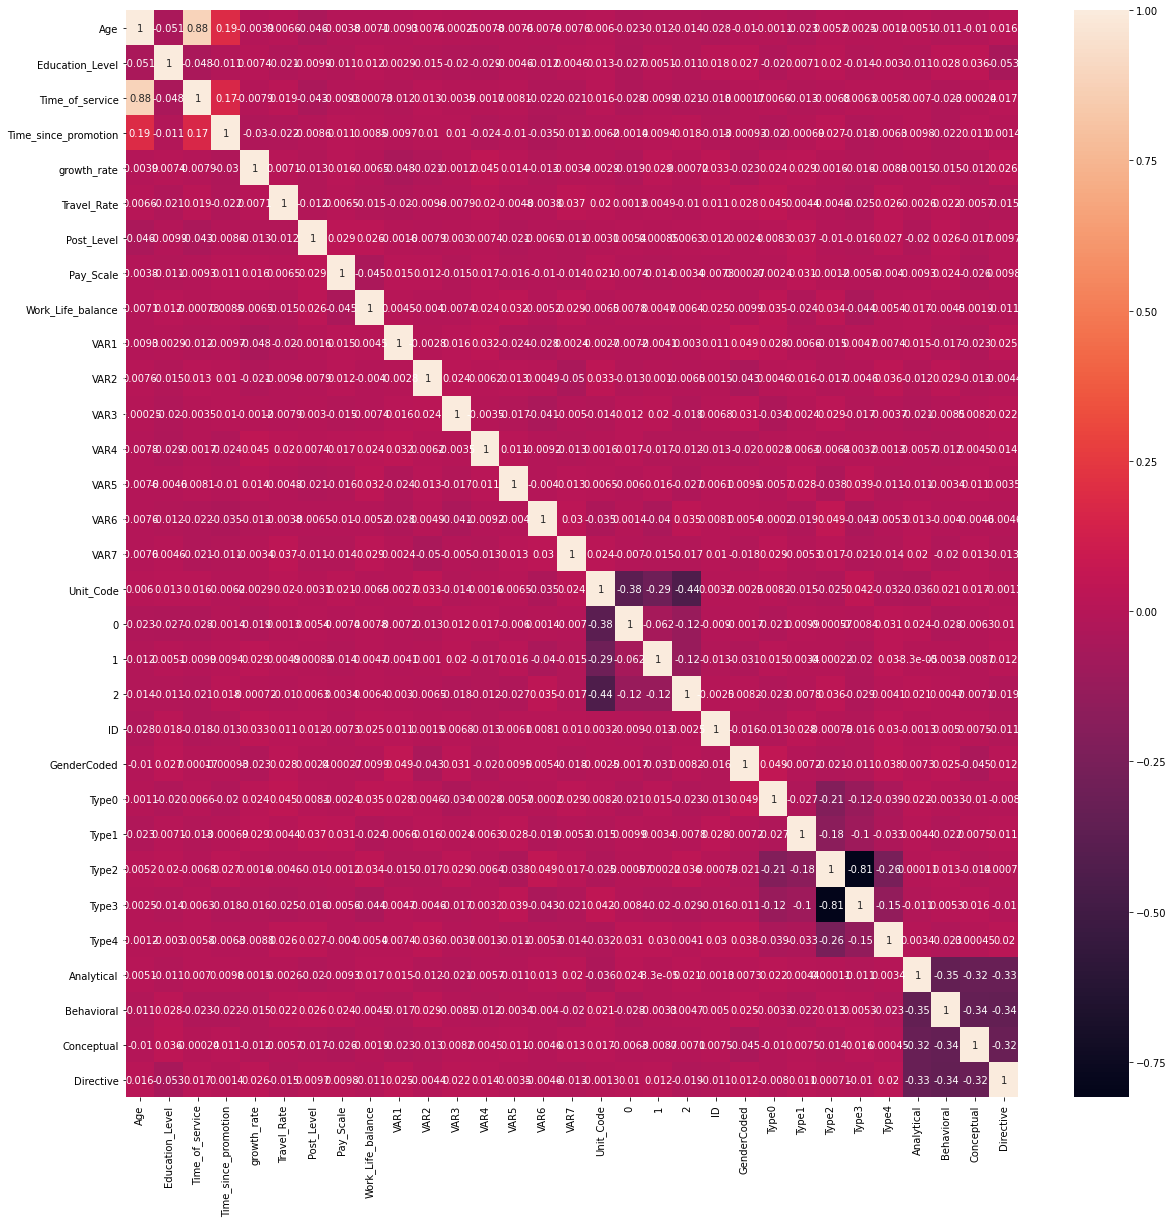

In [30]:
plt.figure(figsize=(20,20))
sns.heatmap(df2.iloc[:,:].corr(), annot=True)